## Data Exploration
In this noteboook we explore the data we got on in the test file. 
We will observe some statistics of the data and visualize it.

In [1]:
# dependencies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import glob
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# helper class to print nice outputs
class txt:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

def make_bold(text):
    return txt.BOLD+ text + txt.END

def make_underline(text):
    return txt.UNDERLINE+ text + txt.END

First, lets take a look on the train file which contains 2 colums- segment_id, and the time_to_eruption . 

In [3]:
train=pd.read_csv('train.csv')
train.head()

,segment_id,time_to_eruption
0,1136037770,12262005
1,1969647810,32739612
2,1895879680,14965999
3,2068207140,26469720
4,192955606,31072429


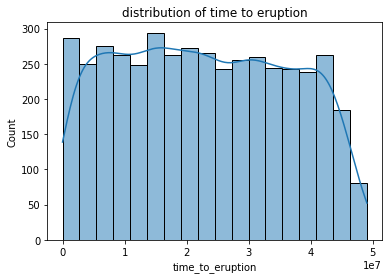

In [4]:
f=sns.histplot(data=train, x="time_to_eruption",kde=True).set_title('distribution of time to eruption')


We can tell that the time to eruption vary from 0 to 5e7 , when not many segments has time of 5e7, so it may be some outlier (we will observe it later on)

Next. we want to explore how the train files looks like

In [5]:
train_files=glob.glob("test/*")
train_files[:5]

['test\\1000213997.csv',
 'test\\100023368.csv',
 'test\\1000488999.csv',
 'test\\1001028887.csv',
 'test\\1001857862.csv']

In [6]:
test_files = glob.glob("train/*")
test_files[:5]

['train\\1000015382.csv',
 'train\\1000554676.csv',
 'train\\1000745424.csv',
 'train\\1001461087.csv',
 'train\\1001732002.csv']

So we can tell that each file represent the segment_id .
Now let's check how many files we have for test and train , and check if there any segments that both in train and test files

In [7]:
print(make_bold("Number of train files:"), len(train_files))
print(make_bold("Number of test files:"), len(test_files))

duplicated_segment_id = [segment_id for segment_id in [test_segment_id.split("/")[-1] for test_segment_id in train_files]
                         if (segment_id in [ train_segment_id.split("/")[-1] for train_segment_id in test_files])]

print(make_bold("Segment ids both in train and test are:"), duplicated_segment_id)

Number of train files: 4520
Number of test files: 4431
Segment ids both in train and test are: []


We can tell that the number of train and test data is approximaly the same size (difference of only 200 samples) and the segment ids for train and test data is completely different.

Next, lets find out how a single file looks like.

In [8]:
# chooe random train file 
segment_id=train.sample()
segment_id=segment_id.iloc[0].segment_id
df_segment_id = pd.read_csv(f'train/{segment_id}.csv') 
df_segment_id.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,960.0,204.0,-129.0,281.0,128.0,288.0,179.0,284.0,-1126.0,-2520.0
1,928.0,234.0,-81.0,238.0,91.0,-937.0,54.0,38.0,-821.0,-2537.0
2,907.0,329.0,-42.0,204.0,60.0,-899.0,-12.0,254.0,-480.0,-2527.0
3,884.0,426.0,-36.0,164.0,59.0,886.0,-2.0,155.0,-384.0,-2489.0
4,898.0,568.0,3.0,99.0,96.0,791.0,42.0,120.0,-414.0,-2406.0


Each segment id consider information of 10 sensors. We can tell there is some missing data, for exaple sensor 9 and sensor 3 is complitly missing in this file. 
We we cop with missing data in the future, but for now we would like to understand some statistics about the sensors.

### Data Visualization:
We would like to get a sense how each sensor distributed.
First, we chose 3 random train files and make a boxplot

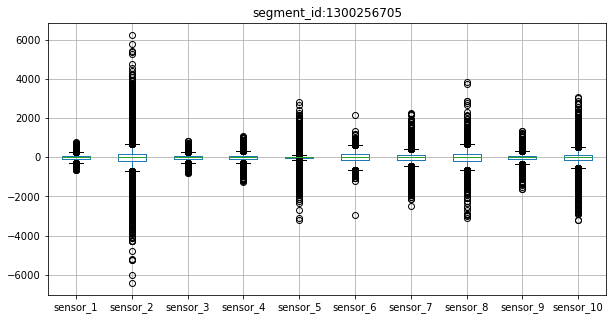

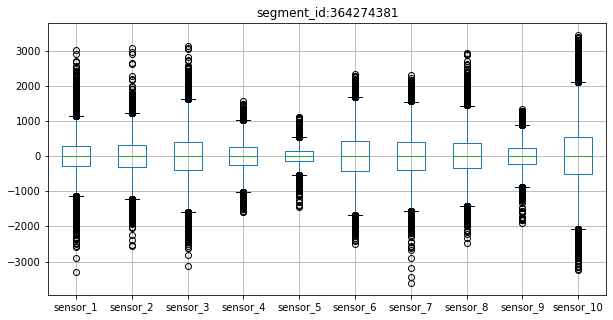

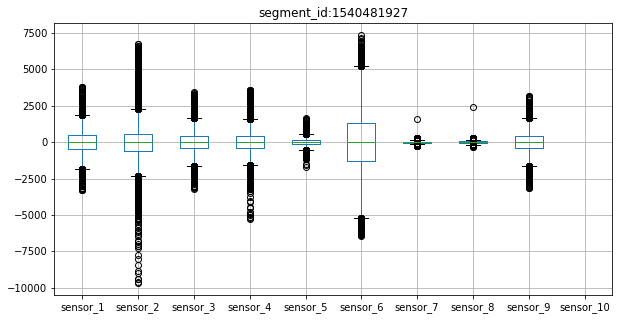

In [9]:
num_of_trains=3;
rows=train.sample(num_of_trains) 
for i in range(num_of_trains):
    segment_id=rows.iloc[i].segment_id
    fig = plt.figure(figsize=(10, 5))
    df_segment_id = pd.read_csv(f'train/{segment_id}.csv') 
    boxplot = df_segment_id.boxplot(column=[f'sensor_{j}' for j in range(1,11)])
    plt.title(f'segment_id:{segment_id}')


Now, we take another 3 train files and plot their sensor distribution

In [10]:
def crete_distplot(segment_id):
    df = pd.read_csv(f'train/{segment_id}.csv') 
    graphs = []

    for i in range(0, 9 , 5):
        idxs = list(np.array([0, 1, 2, 3, 4]) + i)

        fig, axs = plt.subplots(1, 5, sharey=True)
        for k, item in enumerate(idxs):
            g = sns.distplot(df[f"sensor_{item+1}"], ax=axs[k], color="y")
            g.set_title(f"sensor: {item+1}")
            g.set(ylim=(0, 0.0025))
            graphs.append(g)

134592962


C:\Users\Shani\miniconda3\envs\nlp21\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\Shani\miniconda3\envs\nlp21\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


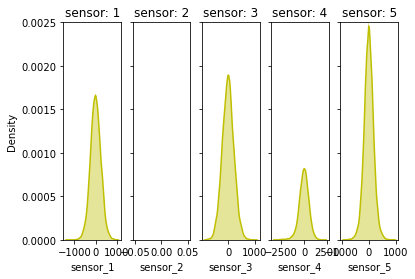

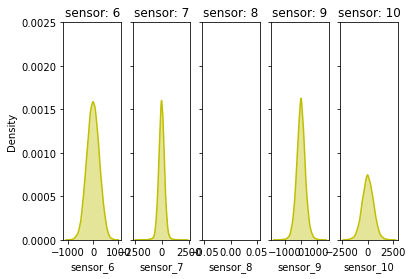

In [11]:
num_of_trains=1
rows=train.sample(num_of_trains)

for num_of_train in range(num_of_trains):
    segment_id=rows.iloc[num_of_train].segment_id
    print(make_bold(f"{segment_id}"))
    crete_distplot(segment_id)

## combine all training data
let combine all data to one file, so we can clean the data and do some pre-proccessing before applying any model


In [12]:
test_files = glob.glob("train/*")
datas = []

for file in test_files:
    df = pd.read_csv(file, index_col=None, header=0)
    segment_id= file.split('.csv')[0]
    datas.append(df)

data = pd.concat(datas, axis=0, ignore_index=True)

In [13]:
data.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,260.0,64.0,-232.0,-36.0,-2.0,-35.0,103.0,389.0,67.0,41.0
1,233.0,175.0,146.0,160.0,-4.0,29.0,-120.0,498.0,59.0,63.0
2,216.0,236.0,321.0,202.0,2.0,113.0,-230.0,554.0,97.0,90.0
3,156.0,205.0,382.0,6.0,12.0,70.0,-228.0,580.0,141.0,122.0
4,158.0,101.0,272.0,-154.0,16.0,45.0,-162.0,624.0,145.0,154.0


### Missing data
Let's look on all train data and see how much missing data we have

In [14]:
test_files = glob.glob("train/*")
num_of_Nan=0
for file in test_files:
    df = pd.read_csv(file)
    num_of_Nan+=df.isna().sum()

In [15]:
print(make_bold("number of Nan per sensor:\n"),num_of_Nan)

number of Nan per sensor:
 sensor_1      1545802
sensor_2     50569629
sensor_3     26499171
sensor_4         6210
sensor_5     49241506
sensor_6        88904
sensor_7      2546627
sensor_8     26465572
sensor_9     10520113
sensor_10     1895973
dtype: int64


Text(0, 0.5, 'number on Nan per sensor')

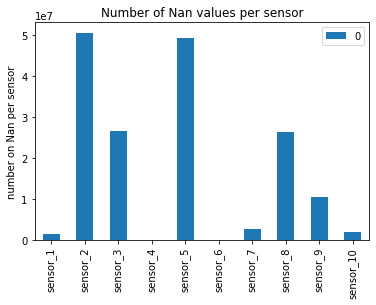

In [16]:
Nans=num_of_Nan.to_frame()
ax=Nans.plot.bar(title='Number of Nan values per sensor')
ax.set_ylabel("number on Nan per sensor")

In [19]:
test_files = glob.glob("train/*")
stat_outliers=0
cols=[]
num_of_rows=0
for j in range(10):
    cols.append(f'sensor_{j+1}')

outliers=pd.DataFrame(columns=cols)
for file in test_files:
    df = pd.read_csv(file)
    num_of_rows+=len(df.index)
    outs=[] 
    for j in range(10):
        outs.append(count_outlier(df, j+1))

    outliers.loc[0]=outs
    stat_outliers+=outliers.sum()

In [20]:
sum(num_of_Nan)/num_of_rows

0.6370897617364994

To handle the missing value,we will replace each missing value with the mean of the column when we apply feature extraction

In [18]:
def count_outlier(df, j):
    q1 = np.percentile(df[f"sensor_{j}"], 25, axis=0)
    q3 = np.percentile(df[f"sensor_{j}"], 75, axis=0)

    max = 2.5*q3 - 1.5*q1
    min = -0.5*q3 - 1.5*q1
    
    return (len(df[f"sensor_{j}"][df[f"sensor_{j}"]  > max] + len(df[f"sensor_{j}"][df[f"sensor_{j}"]  < min])))

In [21]:
print(make_bold("Number of outliers per sensor \n"),stat_outliers)

Number of outliers per sensor 
 sensor_1     2383048.0
sensor_2     3891346.0
sensor_3     2004380.0
sensor_4     2435301.0
sensor_5     2920901.0
sensor_6     1340445.0
sensor_7     2248834.0
sensor_8     1461074.0
sensor_9     1911212.0
sensor_10    2699513.0
dtype: float64


Text(0, 0.5, 'number on outiers per sensor')

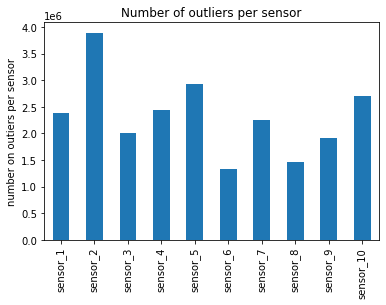

In [22]:
ax=stat_outliers.plot.bar(title='Number of outliers per sensor')
ax.set_ylabel("number on outiers per sensor")

In [23]:
print(make_bold('persetage of outliers: '),(sum(stat_outliers)/num_of_rows))

persetage of outliers:  0.08762380854173005


To handle the outliers,we will remove then when we apply feature extraction

Now that we got some sense about the data we are dealing with , we will do feature extraction.
Feature extraction can be found in "Feature_Extraction" notebook